In [8]:
import numpy as np 

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, value_and_grad, random

import matplotlib.pyplot as plt 

key = random.PRNGKey(25)

print(key, type(key), key.shape)


[ 0 25] <class 'jaxlib.xla_extension.DeviceArray'> (2,)


Unlike the stateful pseudorandom number generators (PRNGs) that users of NumPy and SciPy may be accustomed to, JAX random functions all require an explicit PRNG state to be passed as a first argument. The random state is described by two unsigned 32-bit integers that we call a key, usually generated by the `jax.random.PRNGKey()` function:

In [10]:
a = random.uniform(key, (1000, 1000))

#print('Vanila numpy: ')
%time prod = np.dot(a, a)
#print('Jax (Asynchronous dispatch): ')
%time prod = jnp.dot(a, a)
#print('Jax (Realistic): ')
%time prod = jnp.dot(a, a).block_until_ready()

CPU times: user 36.4 ms, sys: 7.3 ms, total: 43.8 ms
Wall time: 96.1 ms
CPU times: user 39.6 ms, sys: 4.59 ms, total: 44.2 ms
Wall time: 21.6 ms
CPU times: user 37.4 ms, sys: 896 µs, total: 38.3 ms
Wall time: 12 ms


In [11]:
parab = lambda x : x**2

def relu(x): 
    return jnp.maximum(0, x)

def relu_grad(x):
    h = 1e-5 
    return (relu(x + h) - relu(x - h)) / (2 * h)

jit_relu = jit(relu)

x0 = 2.0

In [12]:
#print('JAX function no compilation: ')
%time out = relu(x0).block_until_ready()
# call jitted version of the function to compile for evaluation time
#print('JAX function compiled: ')
%time jit_relu(x0).block_until_ready()
%time out = jit_relu(x0).block_until_ready()


CPU times: user 23.7 ms, sys: 37.1 ms, total: 60.8 ms
Wall time: 175 ms
CPU times: user 16.8 ms, sys: 3.56 ms, total: 20.4 ms
Wall time: 53.4 ms
CPU times: user 181 µs, sys: 61 µs, total: 242 µs
Wall time: 244 µs


In [13]:
print(f'Finite diff grad: {relu_grad(x0)}')
print(f'JAX grad: {jit(grad(jit_relu))(x0)}')

Finite diff grad: 1.0013580322265625
JAX grad: 1.0


In [14]:
s = jnp.linspace(-1, 1, 20)

parab_grad = jit(grad(jit(parab)))
v_parab_grad = vmap(parab_grad, in_axes=0, out_axes=0)

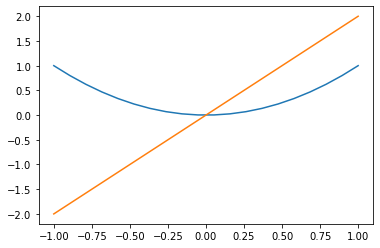

In [15]:
plt.plot(s, parab(s))
plt.plot(s, v_parab_grad(s))

In [ ]:
key = jax.random.PRNGKey(seed)

In [27]:
X = jnp.random.normal()
W = jnp.random.normal()

tf = lambda x : x ** 2

vf = vmap(tf, in_axes=1, out_axes=1)


In [28]:
print(vf(tx))

[[1. 1.]
 [4. 4.]
 [9. 9.]]


In [12]:
print(vmap(lambda x, y: (x * y, x + y), in_axes=(0, None), out_axes=0)(jnp.array([1.,2.]), jnp.array([1.,2.])))

(DeviceArray([[1., 2.],
             [2., 4.]], dtype=float32), DeviceArray([[2., 3.],
             [3., 4.]], dtype=float32))


In [74]:
jax.__version__

'0.3.14'